In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy import stats
import math
from sympy.solvers import solve
from sympy import Symbol, log, exp, diff

## Nr. 3a)

Die Funktion ist im folgenden berechnet und graphisch dargestellt worden. 
Sie lautet: 

\begin{equation}
-ln ( L(\lambda)) = - \sum_{i=1}^{n} ln(f(x_i| \lambda))
\\= - ln\left(\frac{\lambda^{13} e^{-\lambda}}{13!}\right)  - ln\left(\frac{\lambda^{8} e^{-\lambda}}{8!}\right)  - ln\left(\frac{\lambda^{9} e^{-\lambda}}{9!}\right)  
\end{equation}

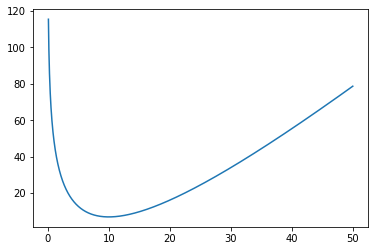

In [2]:
p = np.linspace(0.1, 50, 2000)
def func(x):
    return - np.log(x**13 * np.exp(-x)/math.factorial(13))- np.log(x**8 *np.exp(-x)/math.factorial(8)) - np.log(x**9 * np.exp(-x)/math.factorial(9))

y = func(p)
plt.plot(p, y)
None

## b) 
Hier soll nun die Ableitung und der Wert von $\lambda$ für das Minimum bestimmt werden. 
Dafür haben wir die Ableitung erstmal allgemein bestimmt. 
\begin{equation}
 0 \stackrel{!}{=} \frac{\partial (-ln ( L(\lambda)) )}{\partial \lambda}
\\ = \frac{\partial ( - \sum_{i=1}^{n} ln (\frac{\lambda^{x_i}}{x_i !}) - \lambda)}{\partial \lambda}
\\ = - \sum_{i=1}^{n} (\frac{x_i !}{\lambda^{x_i}}) (x_i \frac{\lambda^{x_i-1}}{x_i !}) - 1
\\ = - \sum_{i=1}^{n} (\frac{x_i}{\lambda} - 1)
\\ \iff - \sum_{i=1}^{n} \frac{x_i}{\lambda} = 3 
\\ \iff - \sum_{i=1}^{n} \frac{x_i}{3} = \lambda
\end{equation}

Damit gilt in diesem Fall $\lambda = 10$. 


## c) 
Hier sollen die Werte von $\lambda$ bestimmt werden, für die sich $ - ln \mathcal{L}_{max} + \frac{1}{2}, - ln \mathcal{L}_{max} + 2$ und $- ln \mathcal{L}_{max} + \frac{9}{2}$ ergeben.

In [3]:
L_max = func(10)
print(f"Der Wert -ln L_max beträgt {L_max}.")

Der Wert -ln L_max beträgt 6.881041446128772.


In [4]:
# Hier nur den Ansatz. Sympy brauchte ewig zum durchlaufen, vielleicht haben wir was falsch gemacht, vielleicht ist unser Rechner aber auch einfach nur nicht gut genug. Deshalb hier nur die Ansätze bei c) und d). Die Idee wird denk ich klar. 
#x = Symbol('x')

#x2 = solve(-1/2 -L_max -log(x**13 * exp(-x)/math.factorial(13))-log(x**8 *exp(-x)/math.factorial(8))-log(x**9 * exp(-x)/math.factorial(9)), x)
#x3 = solve(-2 -L_max -log(x**13 * exp(-x)/math.factorial(13))-log(x**8 *exp(-x)/math.factorial(8))-log(x**9 * exp(-x)/math.factorial(9)), x)
#x4 = solve(-9/2 -L_max -log(x**13 * exp(-x)/math.factorial(13))-log(x**8 *exp(-x)/math.factorial(8))-log(x**9 * exp(-x)/math.factorial(9)), x)

Die Werte, die sich ergeben entsprechen den $\sigma$ Werten. $\sigma_1$ ist bei dem Wert mit 1/2 erreicht, $\sigma_2$ bei 2 und $\sigma_3$ bei 9.


## d)

In [5]:
#z = p
#yTaylor = diff(lambda x: -log(x**13 * exp(-x)/math.factorial(13))-log(x**8 *exp(-x)/math.factorial(8))-log(x**9 * exp(-x)/math.factorial(9)), 1, 0) + diff(lambda x: -log(x**13 * exp(-x)/math.factorial(13))-log(x**8 *exp(-x)/math.factorial(8))-log(x**9 * exp(-x)/math.factorial(9)), 1, 1) + 1/2* diff(lambda x: -log(x**13 * exp(-x)/math.factorial(13))-log(x**8 *exp(-x)/math.factorial(8))-log(x**9 * exp(-x)/math.factorial(9)), 1, 2)

#plt.plot(p, yTaylor, label="Taylorreihe")
#plt.plot(p, y, label="-ln(L)")

Die Näherung passt im Bereich von einem $\sigma$ sehr gut. In diesem Bereich könnte die Taylorreihe gut genutzt werden.

## 4)

In [6]:
x, y= np.genfromtxt("aufg_a.csv", delimiter=",", unpack=True)
x = np.delete(x, (0), axis=0)
y = np.delete(y, (0), axis=0)

Resultierende Koeffizienten für Lambda = 0:  [-6.74453270e-02  6.09609038e-01 -5.13748213e-01  2.10566521e-01
 -4.52007751e-02  4.78568049e-03 -1.96288196e-04]
Resultierende Koeffizienten für Lambda = 0.1:  [ 5.27965881e-02  2.59531150e-01 -1.93231287e-01  7.69667253e-02
 -1.71628071e-02  1.90376484e-03 -8.10349704e-05]
Resultierende Koeffizienten für Lambda = 0.3:  [ 1.11464649e-01  1.07755242e-01 -6.42970516e-02  2.49315776e-02
 -6.33557735e-03  7.89265583e-04 -3.62702783e-05]
Resultierende Koeffizienten für Lambda = 0.7:  [ 1.42378399e-01  4.36794604e-02 -1.71856910e-02  6.46195657e-03
 -2.35843750e-03  3.58573783e-04 -1.81387872e-05]
Resultierende Koeffizienten für Lambda = 3:  [ 1.69656309e-01  7.96727958e-03 -1.06348501e-03 -1.07152882e-04
 -4.91755883e-04  1.07573168e-04 -6.00485672e-06]
Resultierende Koeffizienten für Lambda = 10:  [ 1.73753418e-01  2.10097394e-03 -2.09778443e-03 -1.88380412e-04
 -1.43934178e-04  3.94085783e-05 -2.28679067e-06]


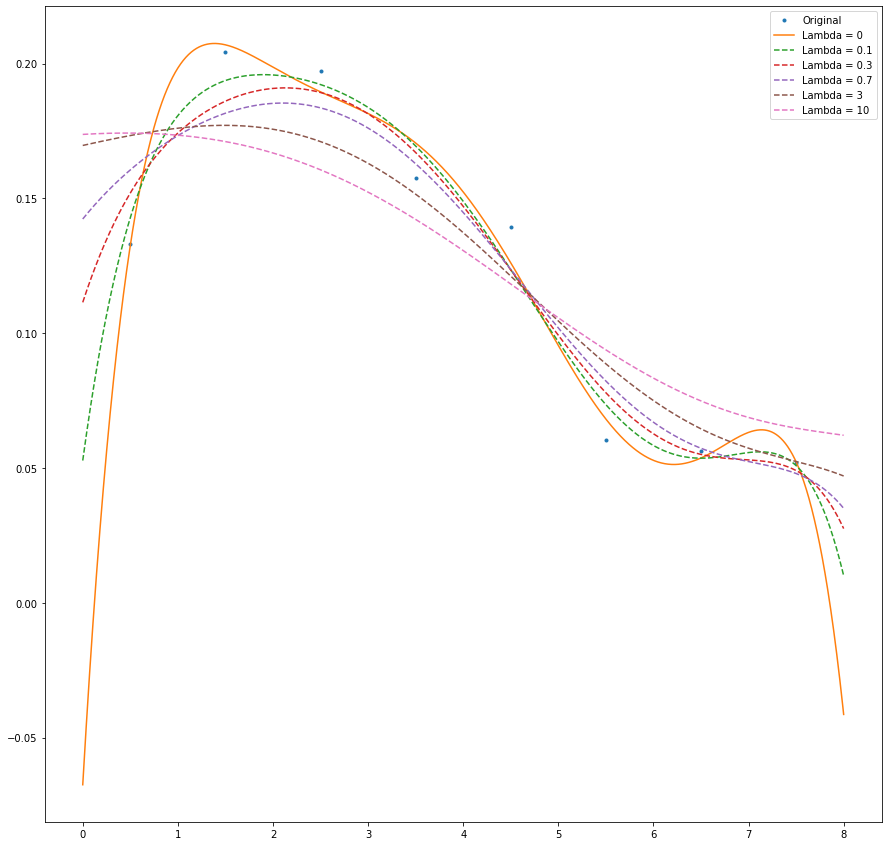

In [7]:
#a)
def func(x, a):
    return x**6 *a[6] + x**5 *a[5] + x**4 *a[4] + x**3 *a[3] + x**2 *a[2] + x**1 *a[1] + x**0 *a[0]
A = np.array([np.ones(len(x)), x, x**2, x**3, x**4, x**5, x**6]).T
a = np.linalg.inv(A.T@A) @ A.T @ y 
print("Resultierende Koeffizienten für Lambda = 0: ", a)
x_new = np.linspace(0, 8, 2000)
y_new = func(x_new, a)
plt.figure(figsize=[15,15])
plt.plot(x, y, ".", label="Original")
plt.plot(x_new, y_new, label="Lambda = 0")

C = np.array([[-1, 1, 0, 0, 0, 0, 0, 0], [1, -2, 1, 0, 0, 0, 0, 0], 
              [0, 1, -2, 1, 0, 0, 0, 0], [0, 0, 1, -2, 1, 0, 0, 0],
             [0, 0, 0, 1, -2, 1, 0, 0], [0, 0, 0, 0, 1, -2, 1, 0], 
             [0, 0, 0, 0, 0, 1, -2, 1], [0, 0, 0, 0, 0, 0, 1, -1]])

lamda = [0.1, 0.3, 0.7, 3, 10]

for i in lamda: 
    A = np.array([np.ones(len(x)), x, x**2, x**3, x**4, x**5, x**6]).T
    a = np.linalg.inv(A.T @ A + i*(C@A).T @(C@A)) @ A.T @ y
    print(f"Resultierende Koeffizienten für Lambda = {i}: ", a)
    x_new = np.linspace(0, 8, 2000)
    y_new = func(x_new, a)
    
    plt.plot(x_new, y_new, "--", label=f"Lambda = {i}")

plt.legend()
None

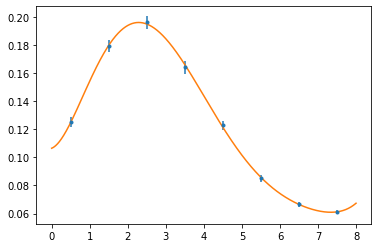

In [8]:
#c)
x = np.genfromtxt("aufg_c.csv", delimiter=",", unpack=True).T
x = np.delete(x, (0), axis=0).T
x, y = x[0], x[1:]
y_mean = y.mean(axis=0)
y_sem = stats.sem(y, axis=0)
W = np.eye(len(x))*1/y_sem

def func(x, a):
    return x**6 *a[6] + x**5 *a[5] + x**4 *a[4] + x**3 *a[3] + x**2 *a[2] + x**1 *a[1] + x**0 *a[0]
A = np.array([np.ones(len(x)), x, x**2, x**3, x**4, x**5, x**6]).T
a = np.linalg.inv(A.T@ W @ A) @ A.T @ W @ y_mean 

x_new = np.linspace(0, 8, 2000)
y_new = func(x_new, a)

plt.errorbar(x, y_mean, yerr=y_sem, fmt=".", label="Original")
plt.plot(x_new, y_new, label="Lambda = 0")
None